# Movie Data Analysis

## Overview

Overview here

## Data Understanding

In [1]:
#Imports
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pickle
import os
from statsmodels.formula.api import ols

### IMDB

In [2]:
im_db = 'data/im.db'

im_db_conn = sqlite3.connect(im_db)

q = """

SELECT *
FROM sqlite_master


;
"""

pd.read_sql(q, im_db_conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
q = """

SELECT *
FROM movie_basics

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
q = """

SELECT *
FROM movie_ratings

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
q = """

SELECT *
FROM persons

;
"""

pd.read_sql(q, im_db_conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [10]:
q = """

SELECT *
FROM directors

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [11]:
q = """

SELECT *
FROM writers

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


### Movie Info

In [3]:
rt_movie_info_df = pd.read_csv("data/rt.movie_info.tsv", delimiter = "\t")
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the movie info table, we noticed that box_office and runtime would need to be changed to numeric and theater_date would need to be changed to date time. 

### Reviews

In [19]:
rt_reviews_df = pd.read_csv("data/rt.reviews.tsv", delimiter = "\t",encoding='latin1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


From the rt_reviews_df we noticed that the rating column had many discrepencies.

### Movies

In [5]:
movies_df = pd.read_csv("data/tmdb.movies.csv")
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


From the movies_df we noticed that the release_date would need to be converted to date time.

### Movie Budgets

In [6]:
budgets_df = pd.read_csv("data/tn.movie_budgets.csv")
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the budgets_df we noticed that the release_date would need to be converted to date time and the production_budget, domestic_gross, and worldwide_gross would need to be converted to numerics.

## Data Preparation

Add filters used and why

In [37]:
q = """
SELECT persons.person_id, persons.primary_name, AVG(movie_ratings.averagerating) AS director_rating, numvotes
FROM persons
LEFT JOIN directors
    USING(person_id)
LEFT JOIN movie_basics
    USING(movie_id)
LEFT JOIN movie_ratings
    USING(movie_id)
WHERE numvotes > 9999 and averagerating != 'NaN'
GROUP BY persons.person_id, persons.primary_name
HAVING director_rating > 7 and COUNT(directors.movie_id) > 5
ORDER BY director_rating DESC
"""

directors_df = pd.read_sql(q, im_db_conn)
directors_df.to_csv('data/directors.csv', index=False)
directors_df.head()

,person_id,primary_name,director_rating,numvotes
0,nm0634240,Christopher Nolan,8.437500,1299334
1,nm1335875,Sukumar,8.428571,41124
2,nm0881279,Lee Unkrich,8.350000,682218
3,nm0751577,Anthony Russo,8.246667,666252
4,nm0751648,Joe Russo,8.246667,666252


Add filters used and why

In [38]:
#Obtaining top writers
q = """
SELECT persons.person_id, persons.primary_name, AVG(movie_ratings.averagerating) AS writer_rating
FROM persons
LEFT JOIN writers 
    USING(person_id)
LEFT JOIN movie_basics
    Using(movie_id)
LEFT JOIN movie_ratings
    Using(movie_id)
WHERE numvotes > 9999 and averagerating != 'NaN'
GROUP BY persons.person_id, persons.primary_name
HAVING writer_rating > 7 and COUNT(writers.movie_id) > 5
ORDER BY writer_rating DESC
"""

writers_df = pd.read_sql(q, im_db_conn)
writers_df.to_csv('data/writers.csv', index=False)
writers_df.head()

,person_id,primary_name,writer_rating
0,nm4160687,Jim Starlin,8.242857
1,nm2353436,Vijayendra Prasad,8.000000
2,nm1158544,Jared Bush,7.771429
3,nm0800209,Joe Simon,7.766667
4,nm1937760,Ritesh Shah,7.750000


Add filters used and why

In [40]:
q = """

SELECT primary_title as movie, genres, averagerating
FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
;
"""

genres_df = pd.read_sql(q, im_db_conn)
genres_df.head()

,movie,genres,averagerating
0,Sunghursh,"Action,Crime,Drama",7.0
1,One Day Before the Rainy Season,"Biography,Drama",7.2
2,The Other Side of the Wind,Drama,6.9
3,Sabse Bada Sukh,"Comedy,Drama",6.1
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5


In [41]:
genres_df.dropna(subset=['genres'], inplace=True)
genres_df.dropna(subset=['averagerating'], inplace=True)

In [42]:
genres_df['genre_list'] = genres_df['genres'].map(lambda x: list(x.split(',')))

In [43]:
genres_df = genres_df.explode('genre_list')

In [45]:
genres_df['genre_list'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genre_list, dtype: int64

Changed original_title to movie in movies_df so they could be merged into one dataframe.
Add reason for merging

In [30]:
#Rename original_title to movie
movies_df.rename(columns = {'original_title':'movie'},inplace = True)
movies_df.shape

(26517, 10)

In [31]:
#Merge movies and budgets dataframes
movies_and_budgets_df = movies_df.merge(budgets_df, how='inner', on = 'movie')
movies_and_budgets_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"


Add reason for merging rt dfs

In [24]:
#Merge rotten tomato data frames
rotten_tomatoes_df = rt_reviews_df.merge(rt_movie_info_df, how='inner', on = 'id')
rotten_tomatoes_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [25]:
#Drop columns with no box_office data
rotten_tomatoes_df.dropna(subset=['box_office','runtime','theater_date'],inplace = True)

In [32]:
#Convert strings to ints
def clean_and_convert_to_int(dataframe, columns_to_clean):
    for col in columns_to_clean:
        dataframe[col] = dataframe[col].str.replace(r'[\$,\D]', "", regex=True)
        dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')
        dataframe[col] = dataframe[col].astype(int)  # Use 'Int64' to handle NaN as nullable integers
    return dataframe

# List of columns to clean and convert to integers
movies_and_budgets_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
rotten_tomatoes_columns = ['box_office', 'runtime']

# Call the function for each DataFrame
movies_and_budgets_df = clean_and_convert_to_int(movies_and_budgets_df, movies_and_budgets_columns)
rotten_tomatoes_df = clean_and_convert_to_int(rotten_tomatoes_df, rotten_tomatoes_columns)

In [35]:
#Confirm dtype change was successful
movies_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2316 non-null   int64  
 1   genre_ids          2316 non-null   object 
 2   id_x               2316 non-null   int64  
 3   original_language  2316 non-null   object 
 4   movie              2316 non-null   object 
 5   popularity         2316 non-null   float64
 6   release_date_x     2316 non-null   object 
 7   title              2316 non-null   object 
 8   vote_average       2316 non-null   float64
 9   vote_count         2316 non-null   int64  
 10  id_y               2316 non-null   int64  
 11  release_date_y     2316 non-null   object 
 12  production_budget  2316 non-null   int64  
 13  domestic_gross     2316 non-null   int64  
 14  worldwide_gross    2316 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 289.5+ KB


In [34]:
#Confirm dtype change was successful
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33017 entries, 0 to 54317
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            33017 non-null  int64 
 1   review        31864 non-null  object
 2   rating_x      25319 non-null  object
 3   fresh         33017 non-null  object
 4   critic        31799 non-null  object
 5   top_critic    33017 non-null  int64 
 6   publisher     32813 non-null  object
 7   date          33017 non-null  object
 8   synopsis      33017 non-null  object
 9   rating_y      33017 non-null  object
 10  genre         33017 non-null  object
 11  director      29176 non-null  object
 12  writer        27448 non-null  object
 13  theater_date  33017 non-null  object
 14  dvd_date      33017 non-null  object
 15  currency      33017 non-null  object
 16  box_office    33017 non-null  int64 
 17  runtime       33017 non-null  int64 
 18  studio        30755 non-null  object
dtypes: i

Add reasons for these columns

In [39]:
#Adding columns for clearer picture
movies_and_budgets_df['foreign_gross'] =  movies_and_budgets_df['worldwide_gross'] - movies_and_budgets_df['domestic_gross']
movies_and_budgets_df['net_gross'] = movies_and_budgets_df['worldwide_gross'] - movies_and_budgets_df['production_budget']
movies_and_budgets_df['release_date_x'] = pd.to_datetime(movies_and_budgets_df['release_date_x'])
movies_and_budgets_df['release_month'] = movies_and_budgets_df['release_date_x'].dt.month
rotten_tomatoes_df['theater_date'] = pd.to_datetime(rotten_tomatoes_df['theater_date'])
rotten_tomatoes_df['theater_month'] = rotten_tomatoes_df['theater_date'].dt.month

#Important to know if worldwide_gross is net_gross or not

In [51]:
#remove outliers
movies_and_budgets_df = movies_and_budgets_df.loc[movies_and_budgets_df['production_budget'] < 250000000]
movies_and_budgets_df = movies_and_budgets_df.loc[movies_and_budgets_df['worldwide_gross'] < 500000000]

Add reason for this merge

In [46]:
movies_budgets_genres_df = movies_and_budgets_df.merge(genres_df, how='inner', on = 'movie')
movies_budgets_genres_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,release_date_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month,genres,averagerating,genre_list
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,"Action,Adventure,Animation",8.1,Action
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,"Action,Adventure,Animation",8.1,Adventure
2,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,"Action,Adventure,Animation",8.1,Animation
3,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"May 7, 2010",170000000,312433331,621156389,308723058,451156389,5,"Action,Adventure,Sci-Fi",7.0,Action
4,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"May 7, 2010",170000000,312433331,621156389,308723058,451156389,5,"Action,Adventure,Sci-Fi",7.0,Adventure


In [47]:
movies_budgets_genres_df.to_csv('data/movies_budgets_genres.csv')

## Data Analysis

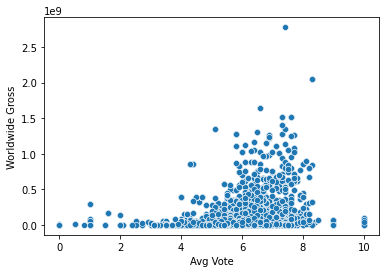

In [62]:
sns.scatterplot(data = movies_budgets_genres_df, x = 'vote_average', y ='worldwide_gross')
plt.xlabel('Avg Vote')
plt.ylabel('Worldwide Gross')
plt.show()

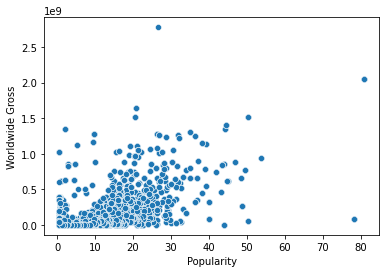

In [61]:
sns.scatterplot(data = movies_budgets_genres_df, x = 'popularity', y ='worldwide_gross')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Gross')
plt.show()

In [63]:
anova_season = ols('worldwide_gross ~C(release_month)', data=movies_budgets_genres_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     23.32
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           9.67e-48
Time:                        11:53:28   Log-Likelihood:            -1.4703e+05
No. Observations:                7126   AIC:                         2.941e+05
Df Residuals:                    7114   BIC:                         2.942e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.213e+07   9.86e+06      9.342      0.000    7.28e+07    1.11e+08
C(release_month)[T.2]   3.418e+07   1.49e+07      2.297      0.022    5.01e+06    6.33e+07
C(release_month)[T.3]   3.472e+07   1.28e+07      2.717      0.007    9.67e+06    5.98e+07
C(release_month)[T.4]  -4.806e+06   1.29e+07     -0.372      0.710   -3.01e+07    2.05e+07
C(release_month)[T.5]   7.944e+07   1.42e+07      5.593      0.000    5.16e+07    1.07e+08
C(release_month)[T.6]   8.118e+07   1.37e+07      5.947      0.000    5.44e+07    1.08e+08
C(release_month)[T.7]   8.263e+07   1.44e+07      5.754      0.000    5.45e+07    1.11e+08
C(release_month)[T.8]    3.06e+04   1.36e+07      0.002      0.998   -2.66e+07    2.67e+07
C(release_month)[T.9]   3.645e+06   1.33e+07      0.275      0.783   -2.23e+07    2.96e+07
C(release_month)[T.10] -2.961e+07   1.25e+07     -2.372      0.018   -5.41e+07   -5.14e+06
C(release_month)[T.11]  9.917e+07   1.31e+07      7.576      0.000    7.35e+07    1.25e+08
C(release_month)[T.12]  5.462e+07   1.32e+07      4.146      0.000    2.88e+07    8.05e+07
==============================================================================
Omnibus:                     4985.112   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75386.402
Skew:                           3.246   Prob(JB):                         0.00
Kurtosis:                      17.551   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
anova_season = ols('worldwide_gross ~C(averagerating)', data=movies_budgets_genres_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     7.564
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.17e-72
Time:                        11:53:37   Log-Likelihood:            -1.4688e+05
No. Observations:                7126   AIC:                         2.939e+05
Df Residuals:                    7051   BIC:                         2.944e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                9.903e+07   1.54e+08      0.643      0.520   -2.03e+08    4.01e+08
C(averagerating)[T.1.7] -6.917e+07   2.67e+08     -0.259      0.795   -5.92e+08    4.53e+08
C(averagerating)[T.1.9] -5.419e+07   1.82e+08     -0.298      0.766   -4.11e+08    3.03e+08
C(averagerating)[T.2.1] -9.896e+07   1.72e+08     -0.575      0.565   -4.36e+08    2.38e+08
C(averagerating)[T.2.2] -9.903e+07   1.88e+08     -0.525      0.599   -4.69e+08     2.7e+08
C(averagerating)[T.2.3] -9.678e+07   1.88e+08     -0.513      0.608   -4.66e+08    2.73e+08
C(averagerating)[T.2.4] -9.325e+07   1.82e+08     -0.512      0.609    -4.5e+08    2.64e+08
C(averagerating)[T.2.5] -9.865e+07   1.99e+08     -0.497      0.620   -4.88e+08    2.91e+08
C(averagerating)[T.2.6]   1.72e+08   1.99e+08      0.866      0.387   -2.17e+08    5.62e+08
C(averagerating)[T.2.7] -9.903e+07   2.18e+08     -0.455      0.649   -5.26e+08    3.28e+08
C(averagerating)[T.2.8]  -8.47e+07   1.82e+08     -0.465      0.642   -4.42e+08    2.72e+08
C(averagerating)[T.2.9]  8.694e+07   1.62e+08      0.536      0.592   -2.31e+08    4.05e+08
C(averagerating)[T.3.0]  1.679e+07   1.63e+08      0.103      0.918   -3.02e+08    3.36e+08
C(averagerating)[T.3.1] -9.404e+07   1.64e+08     -0.574      0.566   -4.15e+08    2.27e+08
C(averagerating)[T.3.2] -5.163e+07   1.63e+08     -0.317      0.751   -3.71e+08    2.67e+08
C(averagerating)[T.3.3] -7.392e+07   1.63e+08     -0.454      0.650   -3.93e+08    2.45e+08
C(averagerating)[T.3.4] -9.322e+07   1.65e+08     -0.567      0.571   -4.16e+08    2.29e+08
C(averagerating)[T.3.5] -9.113e+07    1.6e+08     -0.571      0.568   -4.04e+08    2.22e+08
C(averagerating)[T.3.6]  2.054e+07    1.6e+08      0.129      0.898   -2.92e+08    3.33e+08
C(averagerating)[T.3.7] -5.614e+07   1.62e+08     -0.346      0.729   -3.74e+08    2.62e+08
C(averagerating)[T.3.8] -7.276e+07   1.58e+08     -0.462      0.644   -3.82e+08    2.36e+08
C(averagerating)[T.3.9]  1.613e+07   1.56e+08      0.103      0.918    -2.9e+08    3.22e+08
C(averagerating)[T.4.0]  -8.88e+07    1.6e+08     -0.554      0.579   -4.03e+08    2.25e+08
C(averagerating)[T.4.1] -2.311e+07   1.57e+08     -0.147      0.883   -3.31e+08    2.85e+08
C(averagerating)[T.4.2] -1.831e+07   1.58e+08     -0.116      0.908   -3.28e+08    2.91e+08
C(averagerating)[T.4.3] -1.638e+07   1.58e+08     -0.103      0.918   -3.27e+08    2.94e+08
C(averagerating)[T.4.4] -2.125e+07   1.57e+08     -0.136      0.892   -3.28e+08    2.86e+08
C(averagerating)[T.4.5] -5.324e+07   1.57e+08     -0.340      0.734   -3.61e+08    2.54e+08
C(averagerating)[T.4.6] -2.008e+07   1.55e+08     -0.129      0.897   -3.25e+08    2.85e+08
C(averagerating)[T.4.7] -7.182e+07   1.56e+08     -0.460      0.645   -3.78e+08    2.34e+08
C(averagerating)[T.4.8] -4.876e+07   1.56e+08  

In [65]:
#OLS Regression on Production Budget
# Determine X and y values
X = movies_budgets_genres_df['production_budget']
Y = movies_budgets_genres_df['worldwide_gross']
X_plus_c = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:53:52   Log-Likelihood:            -1.4366e+05
No. Observations:                7126   AIC:                         2.873e+05
Df Residuals:                    7124   BIC:                         2.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -9.59e+06   2.05e+06     -4.688      0.000   -1.36e+07   -5.58e+06
production_budget     3.4047      0.031    108.950      0.000       3.343       3.466
==============================================================================
Omnibus:                     3715.358   Durbin-Watson:                   0.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55051.053
Skew:                           2.150   Prob(JB):                         0.00
Kurtosis:                      15.920   Cond. No.                     8.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[ 3.40466687e+00 -9.59035869e+06]


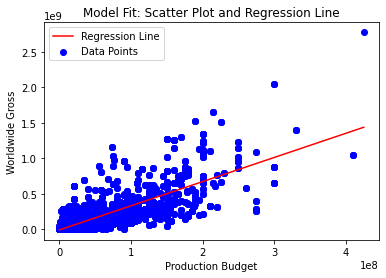

In [66]:
# Plot the model fit (scatter plot and regression line)
# Scatter plot
plt.scatter(X, Y, label='Data Points', color='b', marker='o')

# Linear regression
coefficients = np.polyfit(X, Y, 1)  # Fit a linear regression line (1st degree polynomial)
print(coefficients)
# Generate points for the regression line
regression_line_X = np.linspace(min(X), max(X), 100)
regression_line_Y = np.polyval(coefficients, regression_line_X)

# Plot the regression line
plt.plot(regression_line_X, regression_line_Y, color='r', label='Regression Line')


# Customize the plot
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Model Fit: Scatter Plot and Regression Line')
plt.legend()

# Show the plot
plt.show()
